Link: https://www.tensorflow.org/tutorials/keras/classification

#### Import Dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### Load Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#### Initialise List of Classes

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Data Exploration

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

#### Data Preprocessing

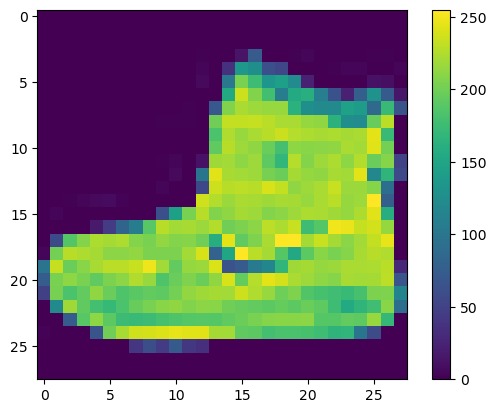

In [9]:
# inspect the first image in the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# scale the pixel values of the images
train_images = train_images / 255.0

test_images = test_images / 255.0

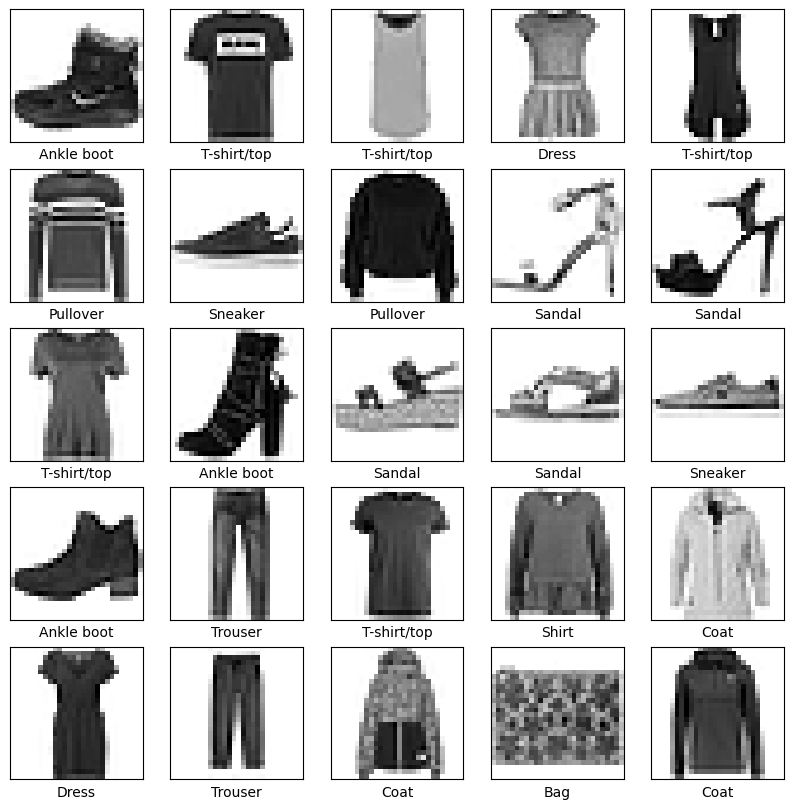

In [11]:
# display first 25 images and the labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Model Building

In [12]:
# set up layers in the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#### Compile the Model

In [13]:
# specify optimizer, loss function and performance metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Model Training

In [14]:
# feed the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4945 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3739 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3341 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3098 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2918 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2784 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2648 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2544 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2436 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.235

#### Model Evaluation

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3308 - accuracy: 0.8861 - 311ms/epoch - 993us/step

Test accuracy: 0.8860999941825867


#### Make Predictions

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 758us/step


In [18]:
# prediction is made based on probability
predictions[0]

array([3.1138695e-06, 6.5460681e-09, 3.3033203e-08, 1.1695399e-06,
       5.8983791e-09, 2.3726263e-04, 6.9024253e-07, 1.8260119e-02,
       3.5287687e-08, 9.8149765e-01], dtype=float32)

In [19]:
# class #9 has the probability => Ankle boot
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### Verify Predictions

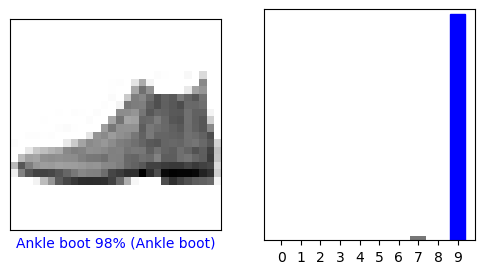

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

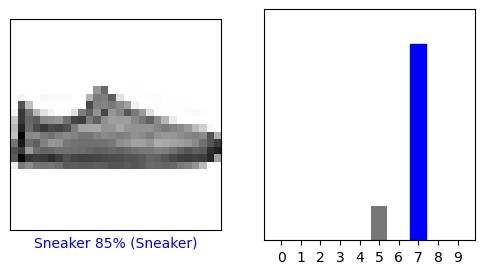

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

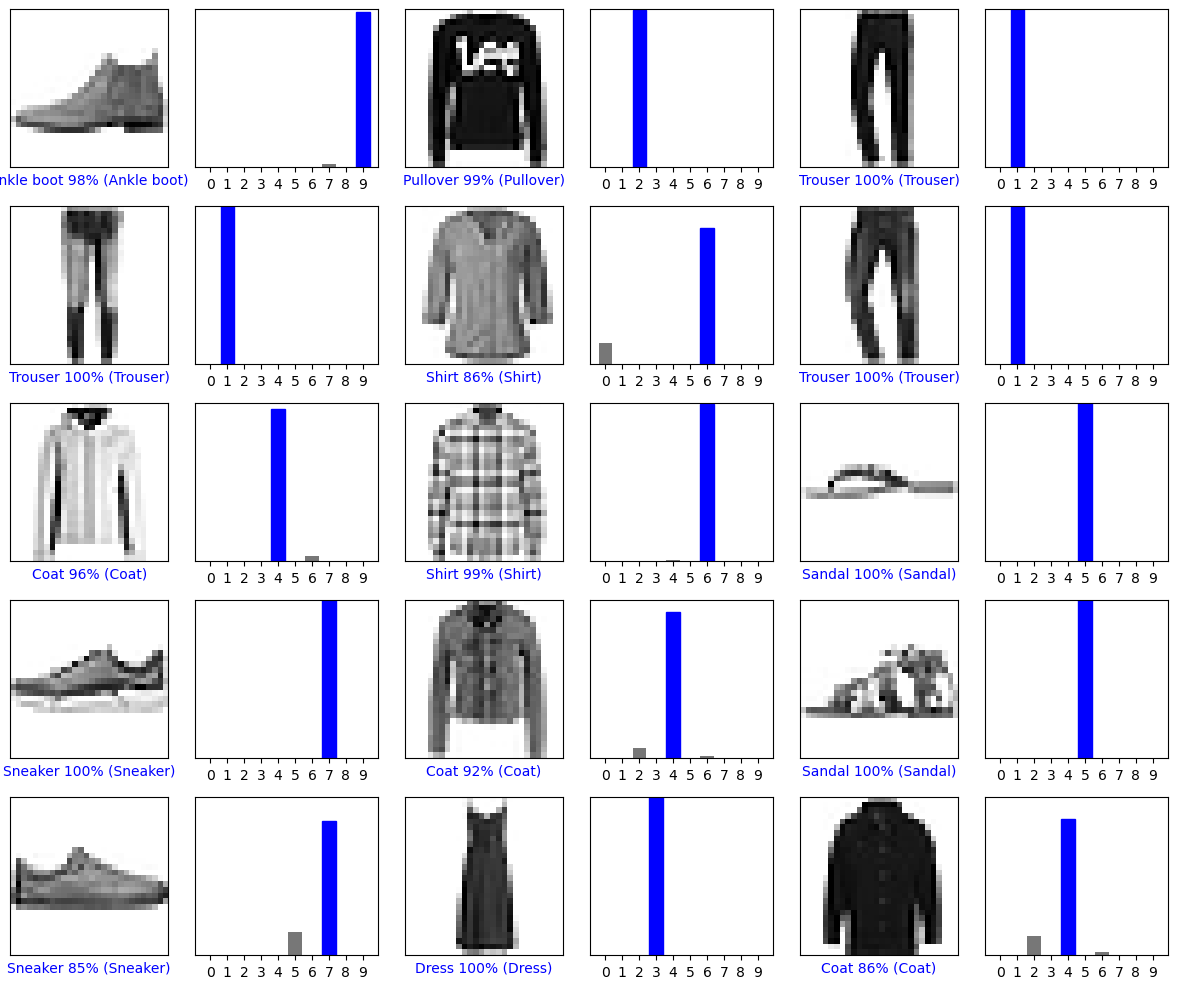

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### Using the Trained Model

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 14ms/step
[[5.9254817e-05 8.7861134e-16 9.9442804e-01 1.9505510e-13 3.9844131e-03
  1.6508933e-16 1.5282849e-03 3.6000980e-15 1.4689669e-10 2.4074320e-14]]


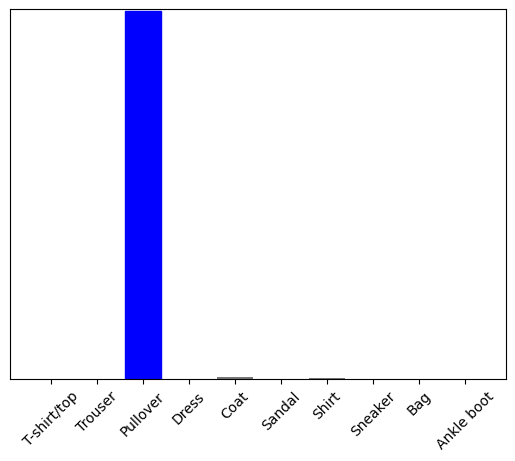

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [29]:
np.argmax(predictions_single[0])

2

In [30]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.